### 题目：波士顿房价预测

#### 任务描述

你将使用波士顿房价数据集来建立一个线性回归模型，预测波士顿各区域的房价。完成以下步骤，并回答相应问题。

#### 数据集

波士顿房价数据集包含506个数据点，每个数据点有14个特征。数据集的主要特征如下：

1. **CRIM**: 城镇人均犯罪率
2. **ZN**: 占地面积超过2.5万平方英尺的住宅用地比例
3. **INDUS**: 城镇非零售业务地区的比例
4. **CHAS**: 查尔斯河虚拟变量 (1 如果土地在河边；否则是0)
5. **NOX**: 一氧化氮浓度（每1000万份）
6. **RM**: 平均每居民房数
7. **AGE**: 在1940年之前建成的所有者占用单位的比例
8. **DIS**: 与五个波士顿就业中心的加权距离
9. **RAD**: 公共交通便利指数
10. **TAX**: 每1万美元的不动产税率
11. **PIRATIO**: 城镇教师学生比例
12. **B**: 城镇黑人比例
13. **LSTAT**: 地区人口中地位低下者比例
14. **MEDV**: 自住房的中位价格（以千美元计）

### 导入相应的数据分析包

In [5]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 数据读取并查看数据的详细信息

In [6]:
f=open(r'D:/LenovoSoftstore/machine-learning-master/machine-learning-master/data/2.Boston_housing/housing.csv','r')
add=pd.read_csv(f)
print(add.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PIRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


### 数据透视

In [7]:
print(add.head)

<bound method NDFrame.head of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PIRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0

In [8]:
import pandas as pd

print(add.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PIRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### 数据可视化（相关系数的可视化——热力图）

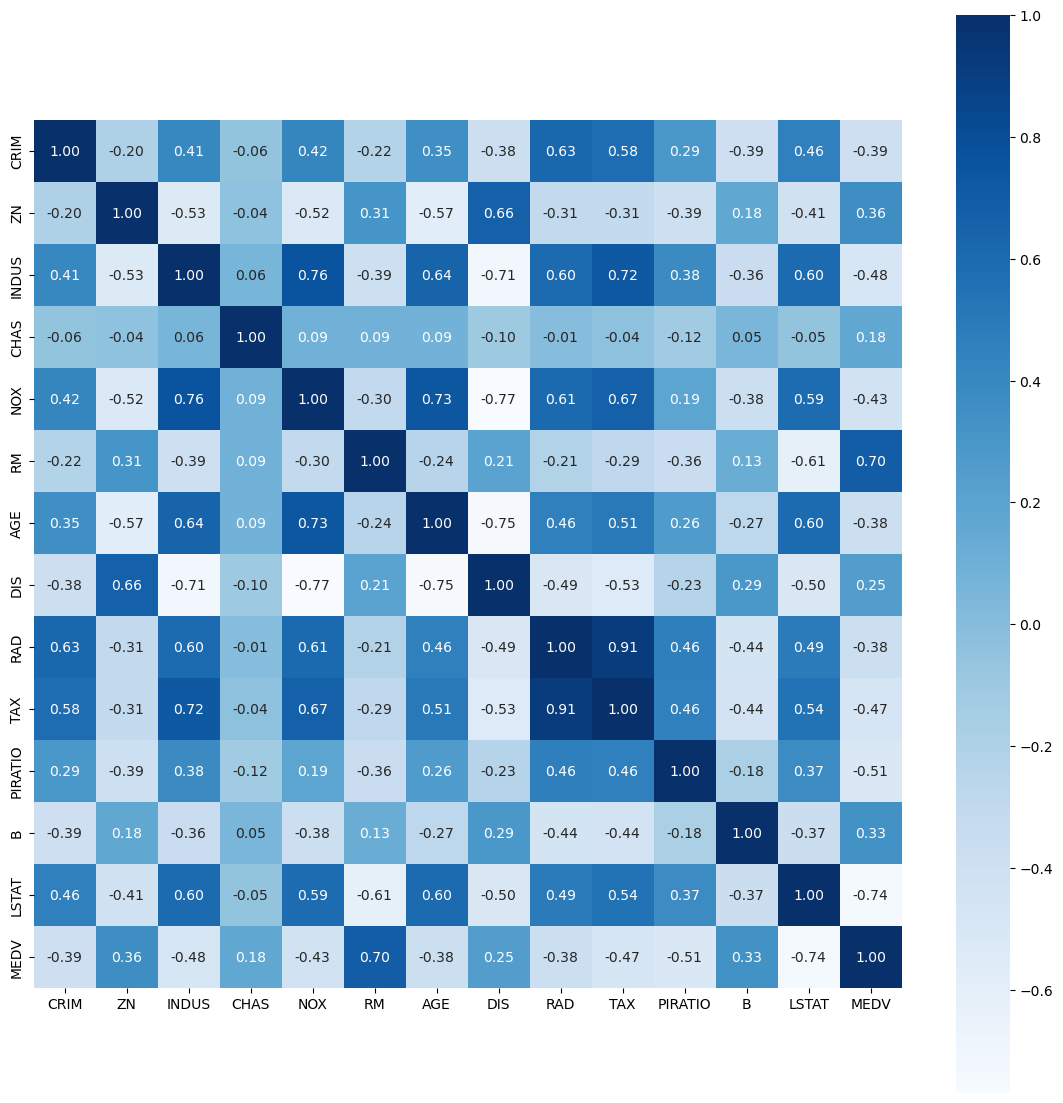

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

d=add.corr()
plt.subplots(figsize = (14,14))
sns.heatmap(d,annot=True,vmax=1,fmt='.2f',square=True,cmap='Blues')
plt.show()

### 数据可视化（相关系数的可视化——热力图）绝对值

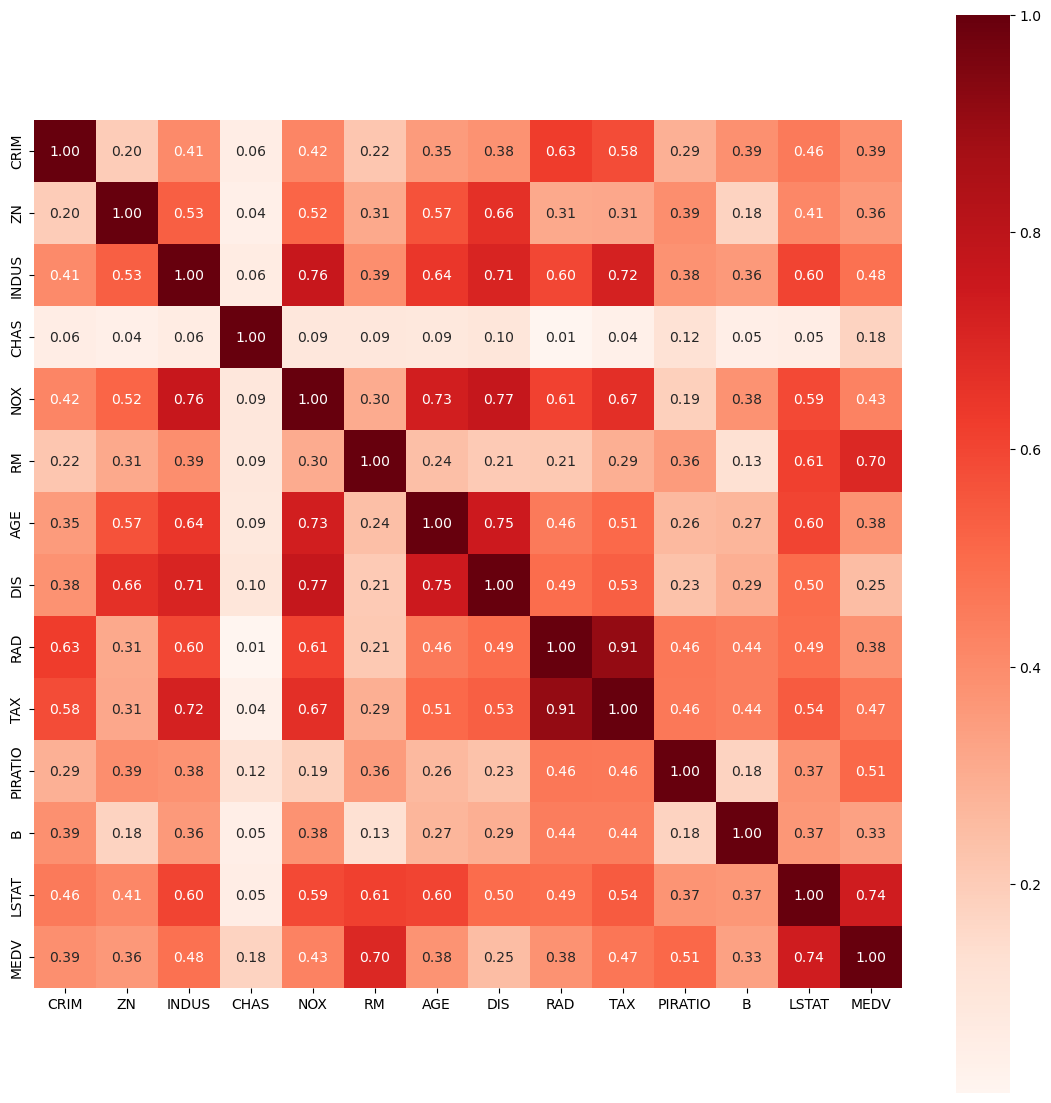

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

d=add.corr()
c=pd.DataFrame.abs(d)
plt.subplots(figsize = (14,14))
sns.heatmap(c,annot=True,vmax=1,fmt='.2f',square=True,cmap='Reds')
plt.show()

### 按照相关系数的绝对值排序

In [11]:
import pandas as pd


d=add.corr()
a=d['MEDV'].copy()
print(a.sort_values())

LSTAT     -0.737663
PIRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64


### 数据可视化（散点图矩阵）

In [12]:
import pandas as pd
import numpy as np

print(add.drop('MEDV',axis=1))

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PIRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

d:\LenovoSoftstore\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


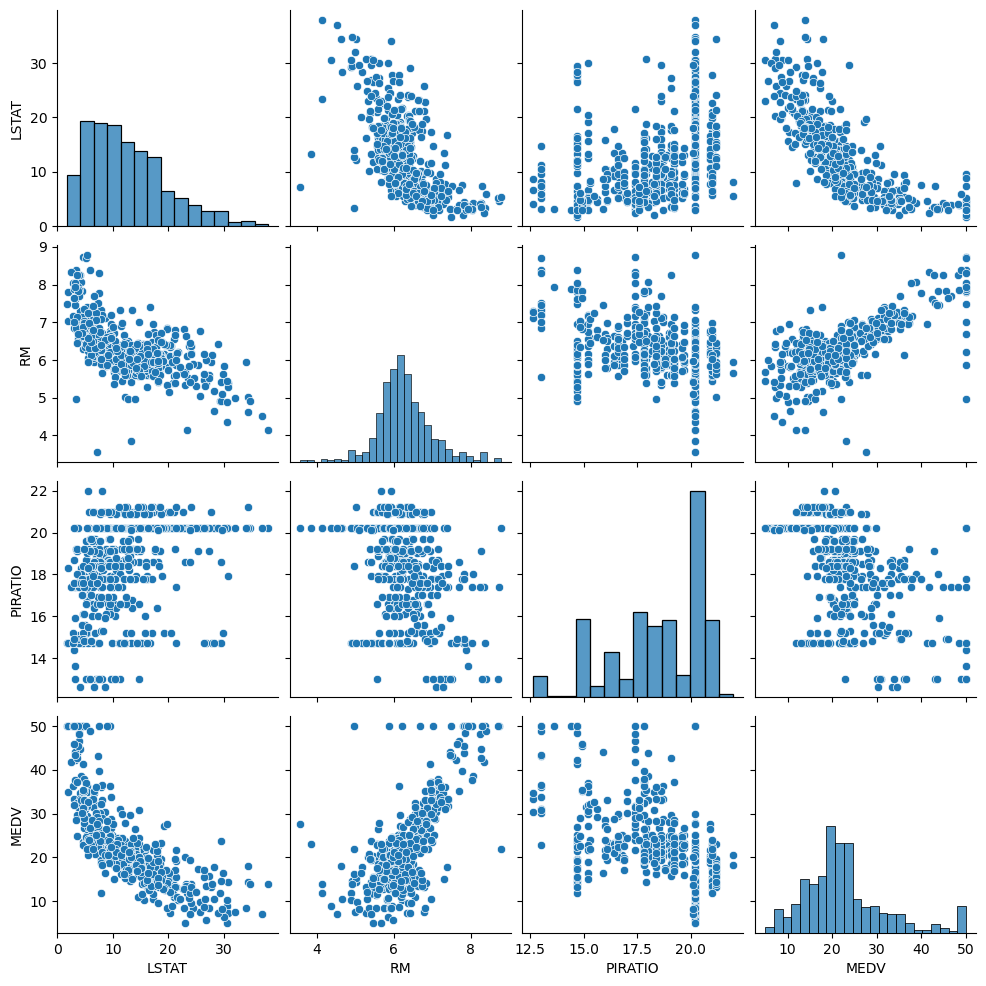

In [13]:

import seaborn as sns

add_san = add[['LSTAT','RM','PIRATIO','MEDV']].copy()
print(sns.pairplot(add_san))

### 数据集的划分

In [14]:
# 使用线性回归模型


In [15]:

x,y=add.drop('MEDV',axis=1),add['MEDV']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=888)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(404, 13)
(404,)
(102, 13)
(102,)


In [16]:

model = LinearRegression()
model.fit(x_train,y_train)
coef=model.coef_
score=model.score(x_test,y_test)
pre = model.predict(x_test)
squared_error = np.sqrt(mean_squared_error(y_test,pre))
print(f"SCORE:{score:.4f}")
print(f"RMSE:{squared_error:.4f}")
coef

SCORE:0.7559
RMSE:4.3708


array([-1.19007229e-01,  3.64055815e-02,  1.68552680e-02,  2.29397031e+00,
       -1.60706448e+01,  3.72371469e+00,  9.22765437e-03, -1.30674803e+00,
        3.43072685e-01, -1.45830386e-02, -9.73486692e-01,  7.89797436e-03,
       -5.72555056e-01])

In [17]:
Title_Coef = pd.DataFrame()
Title_Coef['Title'] = add.drop('MEDV',axis=1).columns
Title_Coef['Coef'] = coef
Title_Coef

,Title,Coef
0,CRIM,-0.119007
1,ZN,0.036406
2,INDUS,0.016855
3,CHAS,2.293970
4,NOX,-16.070645
5,RM,3.723715
6,AGE,0.009228
7,DIS,-1.306748
8,RAD,0.343073
9,TAX,-0.014583


### 模型评估

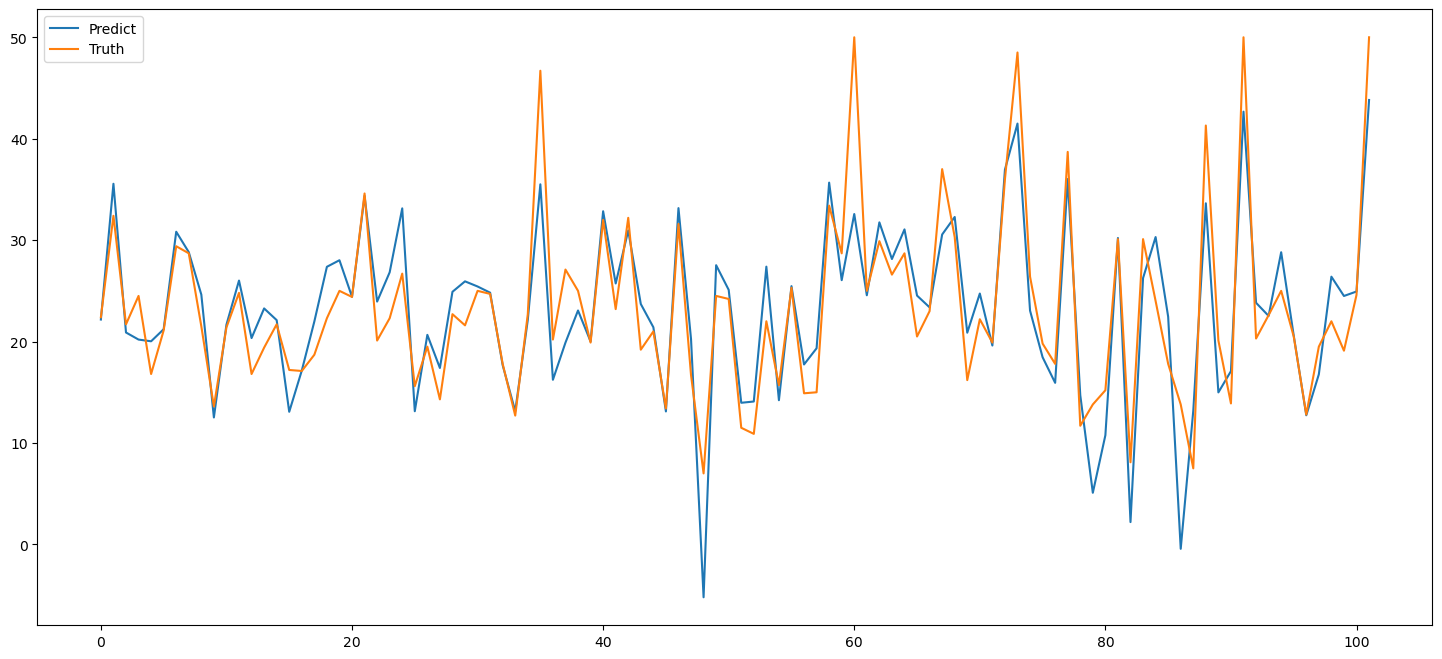

In [18]:
Dpre = pd.DataFrame()
Dpre['Predict'] = pre
Dpre['Truth'] = y_test.reset_index(drop=True)
Dpre.plot(figsize=(18,8))
plt.show()

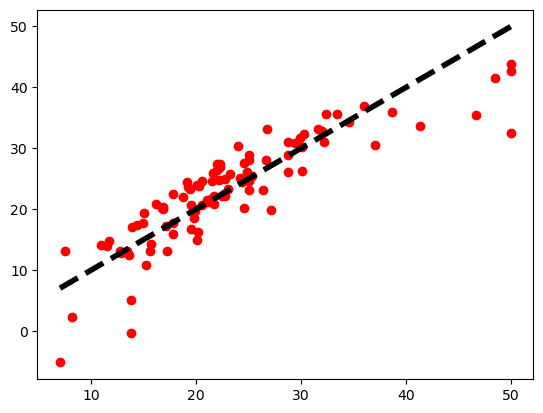

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test,pre,color='r')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='k',linestyle='--', linewidth=4)
plt.show()

SCORE:0.7388
RMSE:4.6959


<Axes: >

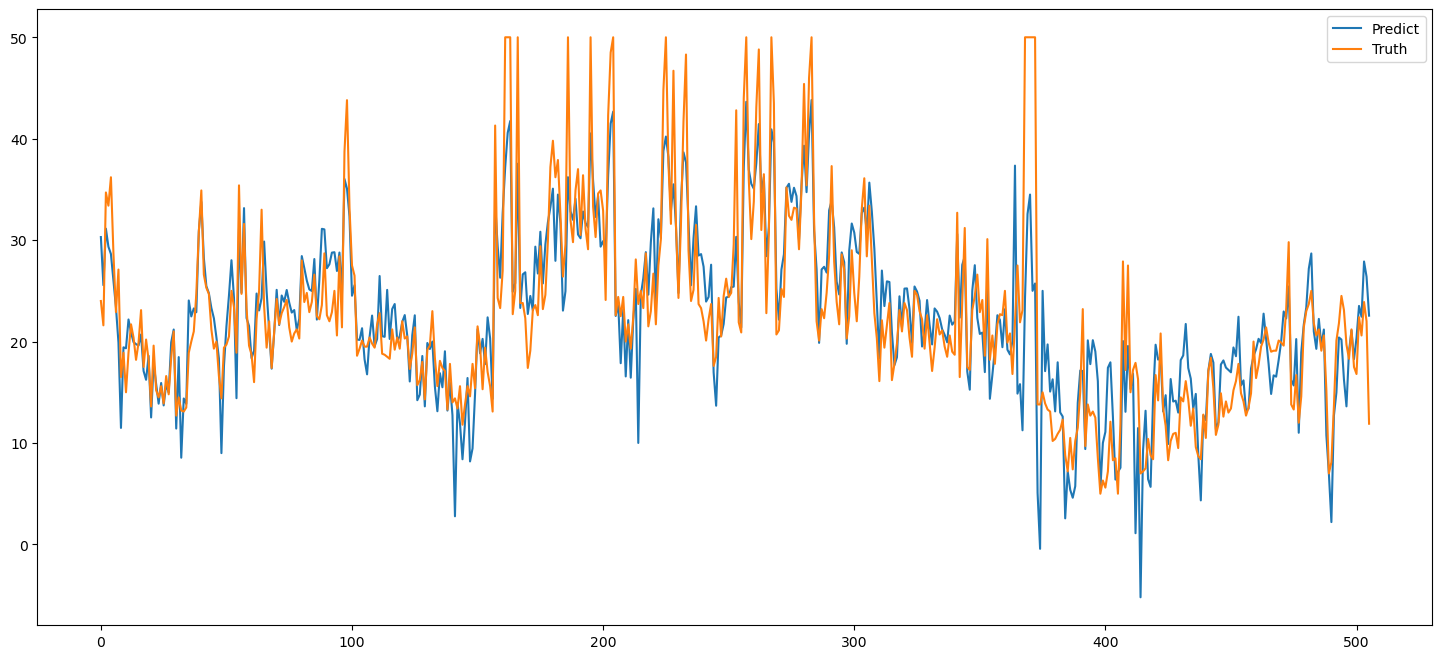

In [20]:
# 使用线性回归模型
Predict = model.predict(x) 
score2=model.score(x,y)
squared_error2=np.sqrt(mean_squared_error(y,Predict))
print(f"SCORE:{score2:.4f}")
print(f"RMSE:{squared_error2:.4f}")
hos_pre_all = pd.DataFrame()
hos_pre_all['Predict'] = Predict
hos_pre_all['Truth'] = y
hos_pre_all.plot(figsize=(18,8))


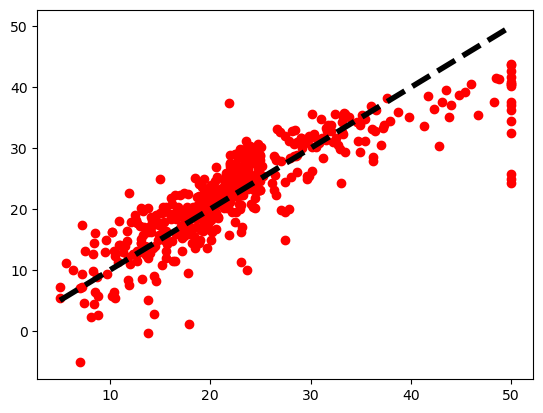

In [21]:
import matplotlib.pyplot as plt

plt.scatter(y,Predict,color='r')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='k',linestyle='--', linewidth=4)
plt.show()

In [22]:
p=d.abs().sort_values('MEDV',axis=0,ascending= False)
print(p['MEDV'].head(4))

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PIRATIO    0.507787
Name: MEDV, dtype: float64
